In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

df['label'] = df['label'].map({'ham': 0, 'spam': 1})

/tmp/ipykernel_53679/335248258.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='cool')


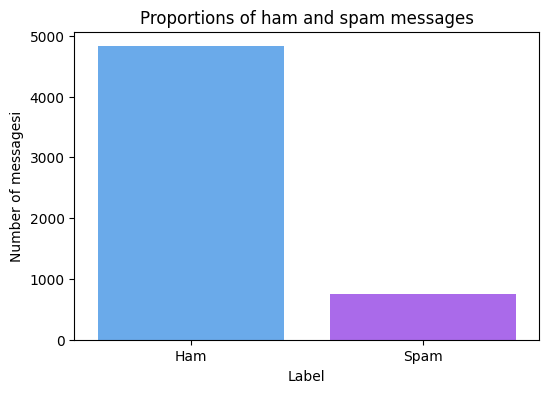

In [37]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='cool')
plt.title("Proportions of ham and spam messages")
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.ylabel('Number of messagesi')
plt.xlabel('Label')
plt.show()

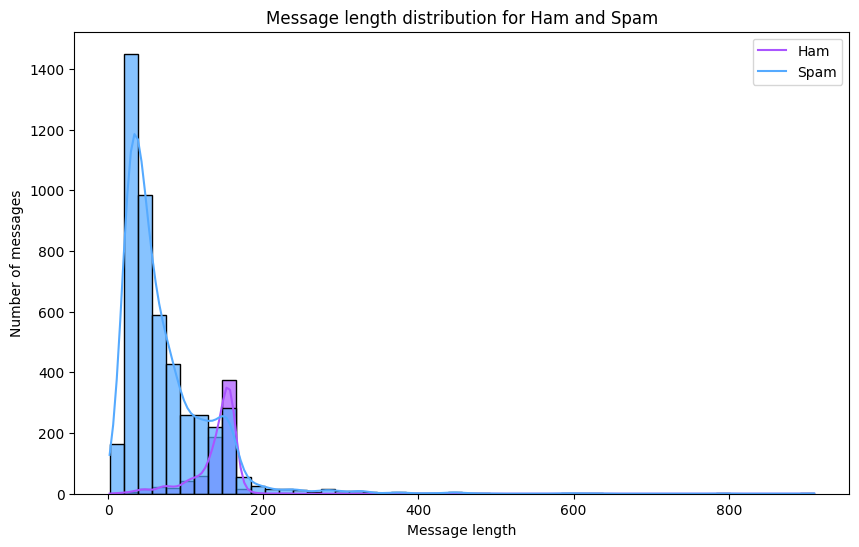

In [38]:
df['message_length'] = df['message'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='message_length', hue='label', bins=50, kde=True, palette='cool', alpha=0.7)
plt.title("Message length distribution for Ham and Spam")
plt.xlabel('Message length')
plt.ylabel('Number of messages')
plt.legend(['Ham', 'Spam'])
plt.show()

In [39]:
X = df['message']
y = df['label']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [42]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [43]:
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)

In [44]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 99.19%

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



### Accuracy over 99% :)

In [45]:
def predict_message(message):
    vec = vectorizer.transform([message])
    prediction = model.predict(vec)
    return "spam" if prediction[0] == 1 else "ham"

In [46]:
custom_message = "Hi! Have you seen that new mouse in the shop?"
print(f"Message: '{custom_message}' is classified as: {predict_message(custom_message)}")

Message: 'Hi! Have you seen that new mouse in the shop?' is classified as: ham


In [47]:
custom_message = "Congratulations! You have won a free ticket to Bahamas. Call now!"
print(f"Message: '{custom_message}' is classified as: {predict_message(custom_message)}")

Message: 'Congratulations! You have won a free ticket to Bahamas. Call now!' is classified as: spam


In [48]:
custom_message = "Sign up for free, limited offer!"
print(f"Message: '{custom_message}' is classified as: {predict_message(custom_message)}")

Message: 'Sign up for free, limited offer!' is classified as: spam


In [49]:
custom_message = "Want to hang out sometime?"
print(f"Message: '{custom_message}' is classified as: {predict_message(custom_message)}")

Message: 'Want to hang out sometime?' is classified as: ham


In [50]:
custom_message = "Thanks for watching!"
print(f"Message: '{custom_message}' is classified as: {predict_message(custom_message)}")

Message: 'Thanks for watching!' is classified as: ham


In [51]:
custom_message = "Consider voting!"
print(f"Message: '{custom_message}' is classified as: {predict_message(custom_message)}")

Message: 'Consider voting!' is classified as: ham
